In [45]:
%matplotlib inline

In [3]:
from crontab import CronTab

In [4]:
cron = CronTab(tabfile = '/Users/sshegheva/workspace/bag-of-algorithms/data/crontab_text.txt')

In [5]:
for job in cron:
    print job

44 11 * * * date >> /opt/dataxu/dxuser/mycrondate
# 54 15 * * * date > /tmp/date.log
# 23 15 * * * date > /tmp/date2.log
# 23 19 * * * date > /tmp/date3.log
* * * * * /sbin/utc_sync_script.sh
2 16 * * * /opt/dataxu/dxuser/echodb.sh >& /tmp/echodb
5 0,6,10,14,18,22 * * * /var/www/analyticsDashboard/scripts/matchRate/makeSite.sh >& /var/www/analyticsDashboard/tmp/matchRate.log
25 23 * * * /var/www/analyticsDashboard/scripts/clusterUse/makeSite.sh >& /tmp/clusterUse.log
5 5 * * * /var/www/analyticsDashboard/scripts/spendReport/paceSpend.sh >& /tmp/pace_spend.log
10 * * * * /var/www/analyticsDashboard/scripts/spendReport/spend.sh >& /tmp/spend_report.log
1 1 * * * /var/www/analyticsDashboard/scripts/rocPlot/roc.sh >& /tmp/roc.log
12 20 * * * /var/www/analyticsDashboard/scripts/rateCurve3Dv3/ratecurve.sh >& /tmp/ratecurve.log
35 13 * * * /var/www/analyticsDashboard/scripts/cpa/cpav2.sh
# 10 8 * * * /var/www/analyticsDashboard/scripts/tuningExperiments/getPlots.sh
2 8 * * * /var/www/analytic

In [6]:
first_cron = cron[0]

In [7]:
first_cron.command

u'date >> /opt/dataxu/dxuser/mycrondate'

In [28]:
first_cron

<CronJob '44 11 * * * date >> /opt/dataxu/dxuser/mycrondate'>

In [11]:
from datetime import datetime

In [32]:
sc = first_cron.schedule(date_from=datetime.now())

In [13]:
sc.next()

1425660240.0

In [34]:
sc.get_next()

datetime.datetime(2015, 3, 6, 11, 44)

In [35]:
data = []
def create_cron_df():
    for job in cron:
        sc = job.schedule(date_from=datetime.now())
        command = job.command
        print command
        time = sc.get_next()
        print time
        data.append([command, sc.get_current()])
        

In [36]:
create_cron_df()

date >> /opt/dataxu/dxuser/mycrondate
2015-03-06 11:44:00
date > /tmp/date.log
2015-03-06 15:54:00
date > /tmp/date2.log
2015-03-06 15:23:00
date > /tmp/date3.log
2015-03-05 19:23:00
/sbin/utc_sync_script.sh
2015-03-05 17:58:00
/opt/dataxu/dxuser/echodb.sh >& /tmp/echodb
2015-03-06 16:02:00
/var/www/analyticsDashboard/scripts/matchRate/makeSite.sh >& /var/www/analyticsDashboard/tmp/matchRate.log
2015-03-05 18:05:00
/var/www/analyticsDashboard/scripts/clusterUse/makeSite.sh >& /tmp/clusterUse.log
2015-03-05 23:25:00
/var/www/analyticsDashboard/scripts/spendReport/paceSpend.sh >& /tmp/pace_spend.log
2015-03-06 05:05:00
/var/www/analyticsDashboard/scripts/spendReport/spend.sh >& /tmp/spend_report.log
2015-03-05 18:10:00
/var/www/analyticsDashboard/scripts/rocPlot/roc.sh >& /tmp/roc.log
2015-03-06 01:01:00
/var/www/analyticsDashboard/scripts/rateCurve3Dv3/ratecurve.sh >& /tmp/ratecurve.log
2015-03-05 20:12:00
/var/www/analyticsDashboard/scripts/cpa/cpav2.sh
2015-03-06 13:35:00
/var/www/ana

In [42]:
import pandas as pd
from matplotlib.dates import date2num

In [38]:
df = pd.DataFrame.from_records(data)

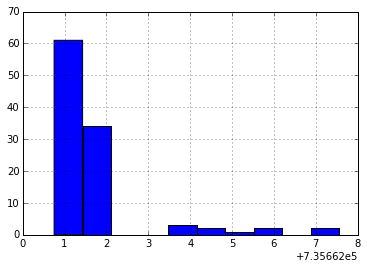

In [46]:
df[1].apply(date2num).hist()